<a href="https://colab.research.google.com/github/Wildwolf4541/TensorFlow/blob/main/02_A_Larger_Example_Of_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [35]:
# Load the dataset
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [36]:
# Convert categorical data into numerical data
insurance_onehot=pd.get_dummies(insurance)
insurance_onehot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [37]:
X= insurance_onehot.drop("charges",axis=1)
y=insurance_onehot["charges"]

In [38]:
X.head(), y.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0        True     False      False        True   
 1   18  33.770         1       False      True       True       False   
 2   28  33.000         3       False      True       True       False   
 3   33  22.705         0       False      True       True       False   
 4   32  28.880         0       False      True       True       False   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0             False             False             False              True  
 1             False             False              True             False  
 2             False             False              True             False  
 3             False              True             False             False  
 4             False              True             False             False  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [40]:
# Build the NN model
# 1. Create the model.
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model.
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
# 3. Fit the model.
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10211.1934 - mae: 10211.1934
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8036.5430 - mae: 8036.5430   
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7310.3315 - mae: 7310.3315 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7857.7642 - mae: 7857.7642 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8032.9282 - mae: 8032.9282 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8091.6982 - mae: 8091.6982   
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7461.6987 - mae: 7461.6987 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7676.9346 - mae: 7676.9346 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7587.9595 - mae: 7587.9595 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7629.5039 - mae: 7629.5039 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7673.0552 - mae: 7673.0552 
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━

In [41]:
# Evaluate on test sets
insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6055.2324 - mae: 6055.2324  


[5854.548828125, 5854.548828125]

In [42]:
y_train.median(), y_train.mean()

(9575.4421, np.float64(13346.089736364485))

This model is way tooo off. Not good at all.

In [44]:
# Added extra layer and Adam Optimizer
# 1. Create the model.
insurance_model2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model.
insurance_model2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])
# 3. Fit the model.
insurance_model2.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13746.5029 - mae: 13746.5029
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13534.4473 - mae: 13534.4473
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12972.3477 - mae: 12972.3477
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12073.1602 - mae: 12073.1602
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11115.3320 - mae: 11115.3320
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9318.0703 - mae: 9318.0703
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8338.0840 - mae: 8338.0840
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7495.5796 - mae: 7495.5796
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7775.3213 - mae: 7775.3213
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7473.9482 - mae: 7473.9482
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7486.7998 - mae: 7486.7998
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [45]:
insurance_model2.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4860.0210 - mae: 4860.0210  


[4722.8330078125, 4722.8330078125]

In [48]:
# Same as above, trained for longer
# 1. Create the model.
insurance_model3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model.
insurance_model3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])
# 3. Fit the model.
history=insurance_model3.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 13668.0820 - mae: 13668.0820
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 11991.3115 - mae: 11991.3115
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12631.8975 - mae: 12631.8975
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12270.9072 - mae: 12270.9072
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10753.8076 - mae: 10753.8076
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9450.2324 - mae: 9450.2324
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8347.9951 - mae: 8347.9951
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7501.4829 - mae: 7501.4829
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7697.0347 - mae: 7697.0347
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7735.8545 - mae: 7735.8545
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7233.5210 - mae: 7233.5210
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━

In [49]:
insurance_model3.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3583.0503 - mae: 3583.0503  


[3507.661376953125, 3507.661376953125]

Text(0.5, 0, 'epochs')

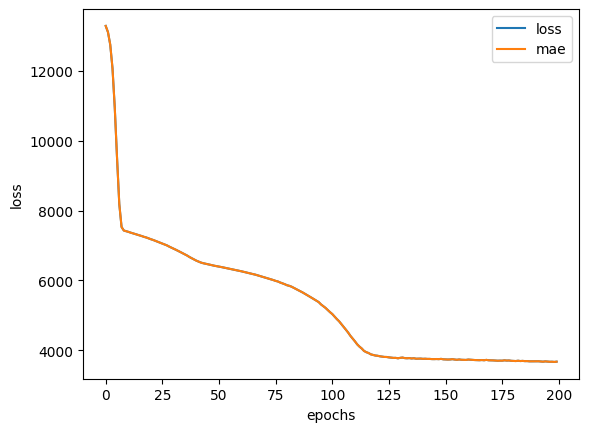

In [50]:
# Plot history (Also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## **🤔 Question: How long should you train for?**

It depends — really, it depends on the problem you're working on.

Many people have asked this before, so TensorFlow provides a built-in solution called the **EarlyStopping Callback.**

🔹 **What is EarlyStopping?**

EarlyStopping is a TensorFlow callback that automatically stops training when your model stops improving on a chosen metric (usually validation loss or MAE).

This helps:

  - Prevent overfitting

  - Save training time

  - Keep the best-performing model weights

# Preprocessing Data (Normalization and Standardization)
The goal of normalization is to change the numeric values of different columns to a common scale.

**Scale (Normalization)** -> converts all values between 0 and 1, **MinMaxScaler**

**Standardization ->** removes the mean and divides each value by the standard deviation, **StadardScaler**

In [60]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


<Axes: title={'center': 'BMI Distribution'}, ylabel='Frequency'>

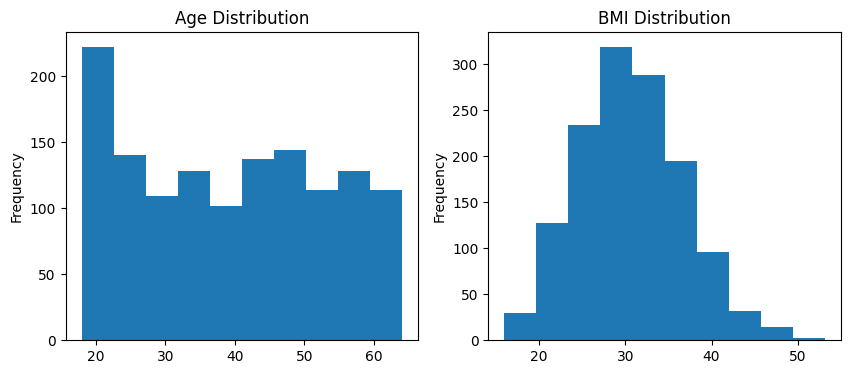

In [59]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
X["age"].plot(kind="hist", title="Age Distribution")

plt.subplot(1, 2, 2)
X["bmi"].plot(kind="hist", title="BMI Distribution")

In [61]:
# Doing everything Again

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [63]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# Create a column transformer
ct=make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

# Create X and y
X=insurance.drop("charges",axis=1)
y=insurance["charges"]

# Split into train and test splits
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal= ct.transform(X_train)
X_test_normal= ct.transform(X_test)

In [67]:
X_train_normal, X_test_normal

(array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
         0.        ],
        [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
         1.        ],
        [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
         1.        ]]),
 array([[0.58695652, 0.24791499, 0.4       , ..., 0.        , 0.        ,
         0.        ],
        [0.39130435, 0.37826204, 0.        , ..., 1.        , 0.        ,
         0.        ],
        [1.        , 0.29391983, 0.        , ..., 1.        , 0.        ,
         0.        ],
        ...,
        [0.43478261, 0.32458972, 0.2       , ..., 0.        , 0.        ,
         0.        ],
        [0.7

In [68]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Now it is ready to go into a neural network model.

In [75]:
tf.random.set_seed(42)

insurance_model_normal = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])

insurance_model_normal.compile(loss=tf.keras.losses.mae,
                              optimizer=tf.keras.optimizers.Adam(),
                              metrics=["mae"])

history=insurance_model_normal.fit(X_train_normal,y_train,epochs=300)

Epoch 1/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 13297.1475 - mae: 13297.1475
Epoch 2/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13276.2197 - mae: 13276.2197
Epoch 3/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 13124.2412 - mae: 13124.2412
Epoch 4/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 12465.4346 - mae: 12465.4346
Epoch 5/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10726.5371 - mae: 10726.5371
Epoch 6/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8566.4531 - mae: 8566.4531
Epoch 7/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7821.5713 - mae: 7821.5713
Epoch 8/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7643.6587 - mae: 7643.6587
Epoch 9/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7472.3701 - mae: 7472.3701
Epoch 10/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7291.7246 - mae: 7291.7246
Epoch 11/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7092.6226 - mae: 7092.6226
Epoch 12/300
34/34 ━━━━━━━━━━━━━━━━━━━━

In [76]:
insurance_model_normal.evaluate(X_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1751.8815 - mae: 1751.8815  


[1764.063232421875, 1764.063232421875]

## This is the best model trained so far. ( I added non-linearity i.e. relu on my own).

In [77]:
insurance_model_normal.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,717 (139.52 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,812 (93.02 KB)

In [90]:
# from tensorflow.keras.utils import plot_model
# plot_model(insurance_model_normal,show_shapes=True,show_layer_names=True)

Text(0.5, 0, 'epochs')

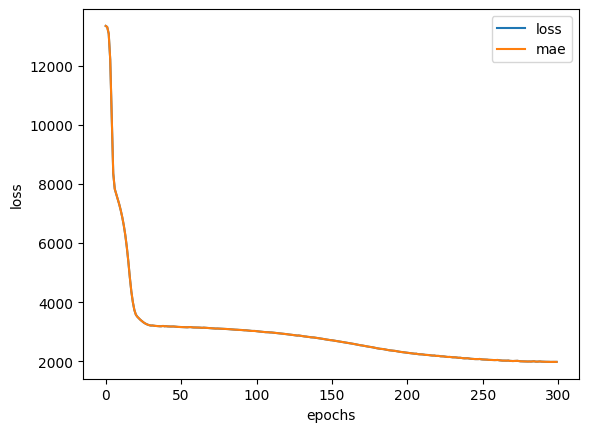

In [78]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [91]:
def plot_predictions(y_true, y_pred):
    """
    Plots actual vs predicted values for regression.
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(6,6))
    plt.scatter(y_true, y_pred, alpha=0.5)

    # Perfect prediction line
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val])

    plt.xlabel("Actual Values (y_true)")
    plt.ylabel("Predicted Values (y_pred)")
    plt.title("Actual vs Predicted")
    plt.grid(True)
    plt.show()


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


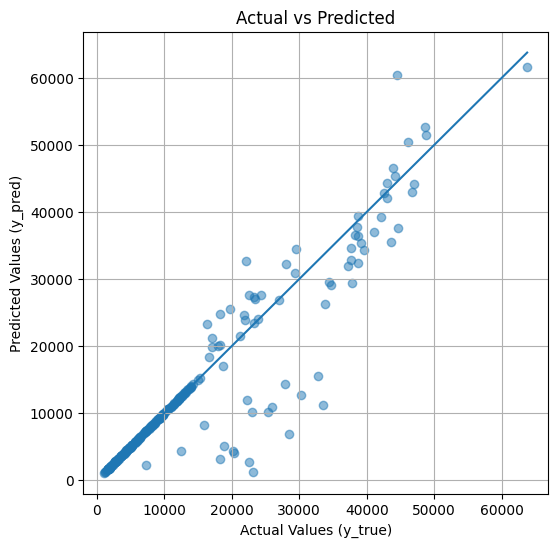

In [94]:
y_pred = insurance_model_normal.predict(X_test_normal).flatten()
plot_predictions(y_test, y_pred)

In [95]:
def plot_residuals(y_true, y_pred):
    residuals = y_true - y_pred

    plt.figure(figsize=(6,4))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(0)
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.title("Residual Plot")
    plt.grid(True)
    plt.show()


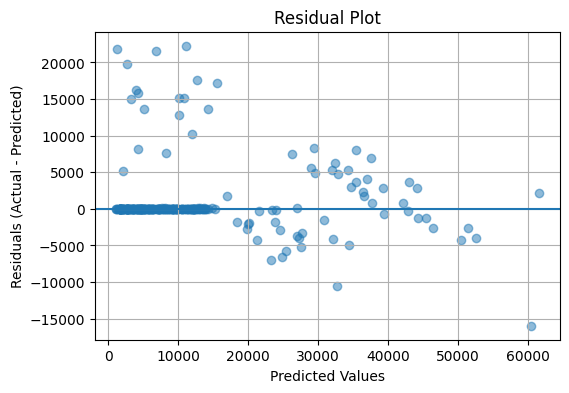

In [96]:
plot_residuals(y_test, y_pred)

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = insurance_model_normal.predict(X_test_normal).flatten()

print("REGRESSION REPORT")
print("------------------")
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²  :", r2_score(y_test, y_pred))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
REGRESSION REPORT
------------------
MAE : 1764.0633594470617
RMSE: 4580.2578861412985
R²  : 0.8648699921604757


END